In [3]:
import numpy as np
import scipy as sp
import pandas as pd

In [4]:
titanic = pd.read_csv("data/titanic-data.csv")

In [5]:
titanic.shape

(891, 12)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(titanic, test_size=0.2,
                                   random_state=0)

In [7]:
X_train.shape

(712, 12)

In [8]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S


In [9]:
np.sum(X_train['Survived'] == 1)

273

In [10]:
survided_ids = X_train['Survived'] == 1

In [11]:
survided = X_train[survided_ids]

In [12]:
np.sum( X_train[survided_ids]['Sex'] == 'female' )

184

In [13]:
np.sum( X_train[survided_ids]['Pclass'] == 1 )

104

In [14]:
# Plotting

# Loading matplotlib library
import matplotlib.pyplot as plt

# IPython setting
%matplotlib inline

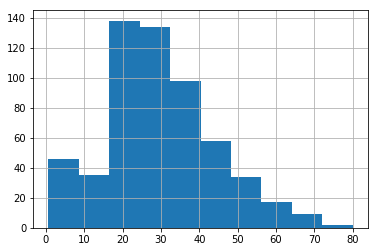

In [15]:
X_train['Age'].hist()

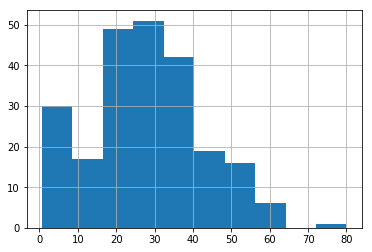

In [16]:
X_train[survided_ids]['Age'].hist()

In [17]:
women_survided_ids = X_train[survided_ids]['Sex'] == 'female'

In [18]:
women_survided = survided[women_survided_ids]

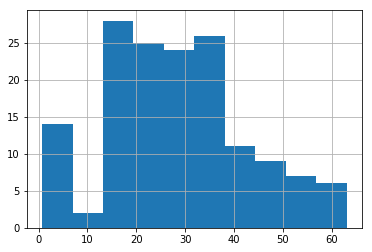

In [19]:
women_survided['Age'].hist()

In [20]:
X_train['Age'].dropna().mean()

29.745183887915935

In [21]:
np.sum( np.isnan(X_train['Age']) )

141

In [22]:
helper = np.zeros((3, 2))

In [23]:
for i, pclass in enumerate([1, 2, 3]):
    ids = X_train['Pclass'] == pclass
    X_train_pclass = X_train[ids]
    for j, sex in enumerate(['male', 'female']):
        ids2 = X_train_pclass['Sex'] == sex
        X_train_pclass_sex = X_train_pclass[ids2]
        mage = X_train_pclass_sex[ids2]['Age'].dropna().mean()
        helper[i, j] = mage

/home/fausto/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [24]:
helper

array([[ 41.37855422,  34.72307692],
       [ 30.204125  ,  29.30172414],
       [ 26.91105769,  20.51623377]])

In [25]:
sexd = {'female': 0, 'male': 1}

X_train['Gender'] = map(lambda x: sexd[x], X_train['Sex'])

/home/fausto/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [26]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,0
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,1
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,1
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S,1


In [27]:
X_train['AgeFill'] = 0

/home/fausto/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
helper

array([[ 41.37855422,  34.72307692],
       [ 30.204125  ,  29.30172414],
       [ 26.91105769,  20.51623377]])

In [29]:
X_train['AgeFill'] = X_train['Age']

/home/fausto/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,0,NaN
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,31.0
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,1,31.0
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,1,20.0
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S,1,21.0


In [31]:
# Setting AgeFill from null values to median (of age and pclass)
for gender in [0, 1]:
    for pclass in [1, 2, 3]:
        ids = ((X_train['Gender'] == gender) &
               (X_train['Pclass'] == pclass) &
               (X_train['Age'].isnull()))
        X_train.loc[ids, 'AgeFill'] = helper[pclass - 1, gender]

/home/fausto/.local/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,0,26.911058
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,31.000000
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,1,31.000000
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,1,20.000000
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S,1,21.000000


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf = DecisionTreeClassifier(random_state=0, max_depth=4)

In [35]:
dims = [2, -2, -1]
A_train = X_train[dims]

In [36]:
y_train = X_train['Survived']

In [37]:
clf = clf.fit(A_train, y_train)

In [38]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file='/tmp/titanic.dot',
               feature_names=A_train.columns,
               class_names=['died', 'survived'],
               rounded=True, filled=True)